## 0. Chargement des données

In [17]:
import pandas as pd

# Charger les données
synthetic_pricing_data_path = "synthetic_pricing_data_calibrated.csv"
df_synthetic_pricing_data = pd.read_csv(synthetic_pricing_data_path)

# Afficher les premières lignes des données
df_synthetic_pricing_data.head()

,index,order_requests,city_x,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy,price
0,0,1,8,21,6.0,0,1,161,46,2,1,1,0,0,204.835708
1,1,1,8,21,6.0,0,1,187,32,1,2,1,1,0,223.086785
2,2,1,8,21,6.0,0,1,279,12,0,0,1,0,0,292.384427
3,3,1,8,21,6.0,0,1,395,10,1,3,0,0,0,326.151493
4,4,1,8,21,6.0,0,1,488,42,1,3,1,1,1,218.292331


### Restreindre la variable price à deux chiffres après la virgule

In [18]:
df_synthetic_pricing_data["price"] = df_synthetic_pricing_data["price"].round(2)

In [19]:
df_synthetic_pricing_data.shape

(6644, 15)

In [23]:
df_synthetic_pricing_data.isnull().sum()

index                0
order_requests       0
city_x               0
date                 0
language           134
mobile               0
avatar_id            0
hotel_id             0
stock                0
group                0
brand                0
parking              0
pool                 0
children_policy      0
price                0
dtype: int64

In [24]:
df_synthetic_pricing_data[df_synthetic_pricing_data['language'].isnull()]

,index,order_requests,city_x,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy,price
117,117,13,2,1,NaN,1,5,131,1,1,3,1,1,0,361.57
118,118,13,2,1,NaN,1,5,258,1,1,3,0,0,1,397.14
119,119,13,2,1,NaN,1,5,265,6,1,3,0,1,0,377.60
120,120,13,2,1,NaN,1,5,370,4,3,3,0,0,0,349.55
121,121,13,2,1,NaN,1,5,418,0,2,1,1,0,0,334.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025,6025,767,5,21,NaN,1,751,899,21,1,2,0,0,0,155.83
6258,6258,798,5,6,NaN,0,379,459,6,3,2,0,0,0,239.83
6259,6259,798,5,6,NaN,0,379,470,5,0,0,0,0,0,283.43
6260,6260,798,5,6,NaN,0,379,653,6,1,1,1,0,0,390.82


In [25]:
df_synthetic_pricing_data.head()

,index,order_requests,city_x,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy,price
0,0,1,8,21,6.0,0,1,161,46,2,1,1,0,0,204.84
1,1,1,8,21,6.0,0,1,187,32,1,2,1,1,0,223.09
2,2,1,8,21,6.0,0,1,279,12,0,0,1,0,0,292.38
3,3,1,8,21,6.0,0,1,395,10,1,3,0,0,0,326.15
4,4,1,8,21,6.0,0,1,488,42,1,3,1,1,1,218.29


In [27]:
df_synthetic_pricing_data['language'].fillna(1, inplace=True)

C:\Users\oba3994\AppData\Local\Temp\ipykernel_9588\4051408567.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_synthetic_pricing_data['language'].fillna(1, inplace=True)


In [28]:
df_synthetic_pricing_data.isnull().sum()

index              0
order_requests     0
city_x             0
date               0
language           0
mobile             0
avatar_id          0
hotel_id           0
stock              0
group              0
brand              0
parking            0
pool               0
children_policy    0
price              0
dtype: int64

## 1. Identifier et visualiser les prix extrêmes pour une éventuelle correction ou transformation des données !

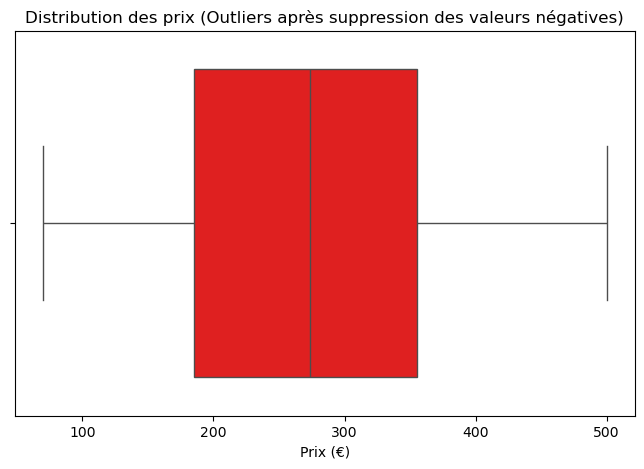

🔍 Nombre total d'outliers détectés : 0
📉 Seuil inférieur : -70.59 €
📈 Seuil supérieur : 610.84 €


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


# Vérification des outliers avec un boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_synthetic_pricing_data["price"], color="red")
plt.title("Distribution des prix (Outliers après suppression des valeurs négatives)")
plt.xlabel("Prix (€)")
plt.show()

# Détection des outliers avec la méthode IQR
Q1 = df_synthetic_pricing_data["price"].quantile(0.25)
Q3 = df_synthetic_pricing_data["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_synthetic_pricing_data[(df_synthetic_pricing_data["price"] < lower_bound) | 
                                     (df_synthetic_pricing_data["price"] > upper_bound)]

# Affichage des résultats
print(f"🔍 Nombre total d'outliers détectés : {outliers.shape[0]}")
print(f"📉 Seuil inférieur : {lower_bound:.2f} €")
print(f"📈 Seuil supérieur : {upper_bound:.2f} €")

### 📊 Analyse de la distribution des prix  

Le boxplot montre une répartition cohérente des prix des hôtels, avec une médiane autour de **200-300 €**, conforme à l'objectif fixé. La majorité des prix se situent entre **100 € et 500 €**, sans valeurs aberrantes détectées. Cette distribution reflète bien l’impact des facteurs influençant les prix, comme la disponibilité des chambres, la présence d’équipements (**parking, piscine**) et l’appartenance à une marque. ✅

## 2. Préparer les données pour l'entraînement : Séparer les données en train/test

In [30]:
from sklearn.model_selection import train_test_split

# Définir les features (X) et la variable cible (y)
X = df_synthetic_pricing_data.drop(columns=["price", "hotel_id", "avatar_id"])  # Supprimer les identifiants inutiles
y = df_synthetic_pricing_data["price"]

# Division en jeu d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérifier la taille des ensembles
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5315, 12), (1329, 12), (5315,), (1329,))

## 3. Entraîner plusieurs modèles de Machine Learning

In [31]:
# Import des modèles
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialiser les modèles
models = {
    "Régression Linéaire": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42),
}

# Dictionnaire pour stocker les résultats
results = {}

# Entraînement et évaluation de chaque modèle
for name, model in models.items():
    print(f"🔄 Entraînement du modèle : {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse

# Afficher les résultats des modèles
results

🔄 Entraînement du modèle : Régression Linéaire...
🔄 Entraînement du modèle : Random Forest...
🔄 Entraînement du modèle : XGBoost...


{'Régression Linéaire': 62.90582838253569,
 'Random Forest': 55.37133228992034,
 'XGBoost': 56.15089453531057}

## 4. Optimiser les hyperparamètres avec GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

# Hyperparamètres pour Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1)
grid_rf.fit(X_train, y_train)

print(f"✅ Meilleurs paramètres pour Random Forest : {grid_rf.best_params_}")
print(f"🏆 Meilleur RMSE : {-grid_rf.best_score_}")

# Hyperparamètres pour XGBoost
param_grid_xgb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 6, 10]
}

grid_xgb = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid_xgb, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print(f"✅ Meilleurs paramètres pour XGBoost : {grid_xgb.best_params_}")
print(f"🏆 Meilleur RMSE : {-grid_xgb.best_score_}")

✅ Meilleurs paramètres pour Random Forest : {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
🏆 Meilleur RMSE : 50.69765850104975
✅ Meilleurs paramètres pour XGBoost : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
🏆 Meilleur RMSE : 49.143262785105684


## 5. Visualiser les résultats

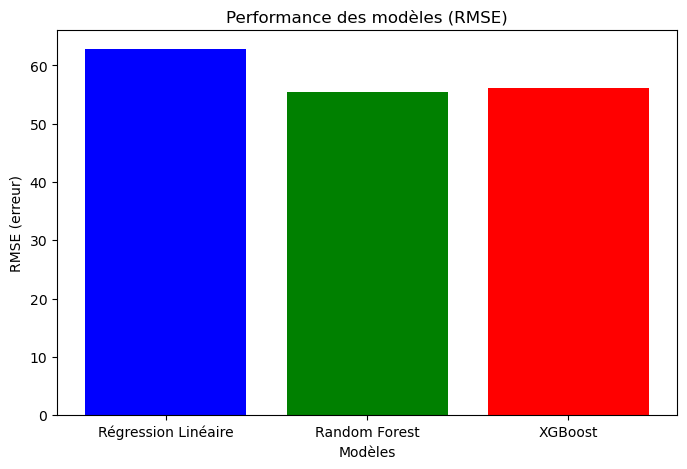

In [33]:
import matplotlib.pyplot as plt

# Afficher les performances des modèles
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=["blue", "green", "red"])
plt.title("Performance des modèles (RMSE)")
plt.xlabel("Modèles")
plt.ylabel("RMSE (erreur)")
plt.show()

## 6. sauvegardons le meilleur modèle dans le dossier backend/model

In [34]:
import joblib
import os

# Créer le dossier s'il n'existe pas
model_dir = "backend/model"
os.makedirs(model_dir, exist_ok=True)

# Sélectionner le meilleur modèle en fonction du RMSE
best_model_name = min(results, key=results.get)  # Modèle avec le plus petit RMSE
best_model = models[best_model_name]

# Définir le chemin de sauvegarde du modèle
model_filename = f"{best_model_name.replace(' ', '_').lower()}_model.pkl"
model_path = os.path.join(model_dir, model_filename)

# Sauvegarder le modèle
joblib.dump(best_model, model_path)

print(f"✅ Le modèle '{best_model_name}' a été sauvegardé sous : {model_path}")

✅ Le modèle 'Random Forest' a été sauvegardé sous : backend/model\random_forest_model.pkl
